In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
features_to_be_dropped  = ['Durchschnittliche Antwortzeitintervalle','network_outgoing_pod-pod-1', 'network_outgoing_pod-pod-3',
       'network_outgoing_pod-pod-4', 'network_outgoing_pod-pod-5',
       'network_outgoing_pod-pod-9', 'network_outgoing_pod-pod-10',
       'network_outgoing_pod-pod-11', 'network_outgoing_system',
       'cpu_pod-pod-1', 'cpu_pod-pod-2', 'cpu_pod-pod-3', 'cpu_pod-pod-4',
       'cpu_pod-pod-5', 'cpu_pod-pod-6', 'cpu_pod-pod-9', 'cpu_pod-pod-11',
       'cpu_pod-pod-12', 'cpu_pod-pod-13', 'pod-restart-count-pod-1', 'pod-restart-count-pod-2',
       'pod-restart-count-pod-3', 'pod-restart-count-pod-4',
       'pod-restart-count-pod-5', 'pod-restart-count-pod-6',
       'pod-restart-count-pod-8', 'pod-restart-count-pod-10',
       'pod-restart-count-pod-11', 'pod-restart-count-pod-12',
       'pod-restart-count-pod-13', 'network_outgoing_pod-pod-14', 'cpu_pod-pod-14',
       'network_outgoing_pod-pod-15', 'network_outgoing_pod-pod-16',
       'network_outgoing_pod-pod-17', 'network_outgoing_pod-pod-18',
       'network_outgoing_pod-pod-19', 'network_outgoing_pod-pod-20',
       'network_outgoing_pod-pod-21', 'network_outgoing_pod-pod-22',
       'network_outgoing_pod-pod-23', 'network_outgoing_pod-pod-24',
       'network_outgoing_pod-pod-25', 'cpu_pod-pod-15', 'cpu_pod-pod-16',
       'cpu_pod-pod-17', 'cpu_pod-pod-18', 'cpu_pod-pod-19', 'cpu_pod-pod-20',
       'cpu_pod-pod-21', 'cpu_pod-pod-22', 'cpu_pod-pod-23', 'cpu_pod-pod-24',
       'cpu_pod-pod-25', 'pod-restart-count-pod-14',
       'pod-restart-count-pod-15', 'pod-restart-count-pod-16',
       'pod-restart-count-pod-17', 'pod-restart-count-pod-18',
       'pod-restart-count-pod-19', 'pod-restart-count-pod-20',
       'pod-restart-count-pod-21', 'pod-restart-count-pod-22',
       'pod-restart-count-pod-23', 'pod-restart-count-pod-24',
       'pod-restart-count-pod-25']

In [3]:
df = pd.read_csv('./../../../timeseries/combined/combined_timeseries_final.csv')
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df.select_dtypes(include=['float64', 'int64'])))
df_imputed.columns = df.select_dtypes(include=['float64', 'int64']).columns
df_imputed['Timestamp'] = df['Timestamp']  # Timestamp (oder andere nicht-numerische Spalten) hinzufügen, falls benötigt

In [4]:
X = df_imputed.drop(features_to_be_dropped, axis=1)
y = df_imputed['Durchschnittliche Antwortzeitintervalle']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Trainieren des Modells
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Sie haben bereits den MSE berechnet:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# Berechnung des RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Berechnung des MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# Berechnung des MAPE (Mean Absolute Percentage Error)
# Achtung: MAPE erwartet, dass keine echten Werte von 0 enthalten sind, da dies zu einer Division durch Null führen würde.
mape = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE:", mape)

MSE: 4571007.315660066
RMSE: 2137.991420857452
MAE: 1086.468771088446
MAPE: 2.5456686645046493e+17


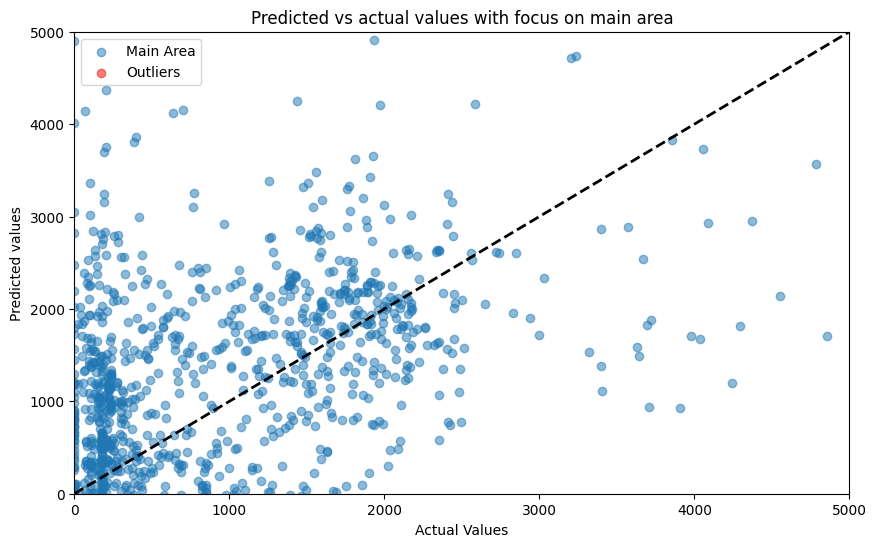

In [10]:
plt.figure(figsize=(10, 6))

# Definieren des Hauptbereichs für die Darstellung
hauptbereich_max = 5000

# Erstellen eines Scatter-Plots für Werte innerhalb des Hauptbereichs
im_hauptbereich = y_test <= hauptbereich_max
plt.scatter(y_test[im_hauptbereich], y_pred[im_hauptbereich], alpha=0.5, label='Main Area')

# Optional: Hervorheben von Ausreißern mit anderer Farbe oder Marker
ausreisser = y_test > hauptbereich_max
plt.scatter(y_test[ausreisser], y_pred[ausreisser], color='red', alpha=0.5, label='Outliers')

# Anpassen der y-Achse des Plots, um den Fokus auf den Hauptbereich zu setzen
plt.ylim(0, hauptbereich_max)

# Anpassen der x-Achse, falls gewünscht
plt.xlim(0, hauptbereich_max)

plt.title('Predicted vs actual values with focus on main area')
plt.xlabel('Actual Values')
plt.ylabel('Predicted values')
plt.plot([0, hauptbereich_max], [0, hauptbereich_max], 'k--', lw=2)  # Diagonale Linie im Hauptbereich
plt.legend()

    
plt.savefig("pred_vs_actual.pdf", format='pdf')

plt.show()

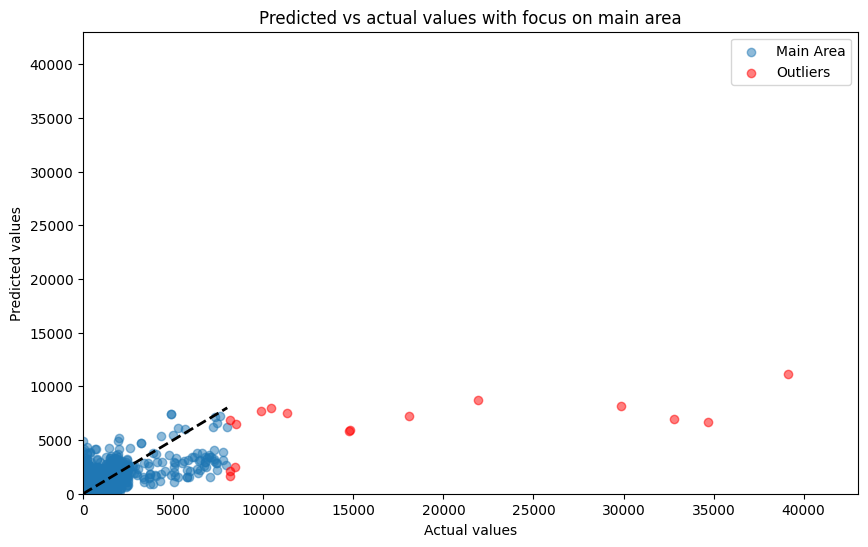

In [11]:
plt.figure(figsize=(10, 6))

# Definieren des Hauptbereichs für die Darstellung
hauptbereich_max = 8000

# Erstellen eines Scatter-Plots für Werte innerhalb des Hauptbereichs
im_hauptbereich = y_test <= hauptbereich_max
plt.scatter(y_test[im_hauptbereich], y_pred[im_hauptbereich], alpha=0.5, label='Main Area')

# Hervorheben von Ausreißern mit anderer Farbe oder Marker
ausreisser = y_test > hauptbereich_max
plt.scatter(y_test[ausreisser], y_pred[ausreisser], color='red', alpha=0.5, label='Outliers')

# Anpassen der y-Achse des Plots, um den Fokus auf den Hauptbereich zu setzen, aber auch Ausreißer anzeigen
plt.ylim(0, max(max(y_test), max(y_pred), hauptbereich_max) * 1.1)

# Anpassen der x-Achse, um den Fokus auf den Hauptbereich zu setzen, aber auch Ausreißer anzeigen
plt.xlim(0, max(max(y_test), max(y_pred), hauptbereich_max) * 1.1)

plt.title('Predicted vs actual values with focus on main area')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot([0, hauptbereich_max], [0, hauptbereich_max], 'k--', lw=2)  # Diagonale Linie im Hauptbereich
plt.legend()

    
plt.savefig("pred_vs_actual_outliers.pdf", format='pdf')

plt.show()